In [ ]:
# Simplified installation (remove redundant packages)
!pip install -q yfinance prophet plotly pandas matplotlib joblib scikit-learn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtbb2 is already the newest version (2020.3-1ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
# Install Condacolab to integrate Conda with Colab
!pip install -q condacolab

# Import and run Condacolab to enable Conda
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!pip install -q yfinance
!pip install -q plotly

In [ ]:
# !pip install -q fbprophet

In [ ]:
# !pip install prophet --no-binary :all:



In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import yfinance as yf
from PIL import Image

# # from fbprophet import Prophet
# from fbprophet.plot import add_changepoints_to_plot

In [ ]:
# Updated import (prophet)
from prophet.plot import add_changepoints_to_plot

In [ ]:
import joblib
import os

# Create models directory
os.makedirs('prophet_models', exist_ok=True)

In [ ]:
# Loading the data
data = pd.read_csv('/content/df_Prophet_Autots.csv')
data.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [ ]:
data.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [ ]:
data.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [ ]:
data

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,71.23,...,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
5011,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5012,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5013,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94


In [ ]:
data.dtypes

,0
Time Serie,object
AUSTRALIA - AUSTRALIAN DOLLAR/US$,float64
EURO AREA - EURO/US$,float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$,float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$,float64
BRAZIL - REAL/US$,float64
CANADA - CANADIAN DOLLAR/US$,float64
CHINA - YUAN/US$,float64
HONG KONG - HONG KONG DOLLAR/US$,float64
INDIA - INDIAN RUPEE/US$,float64


In [ ]:
# If your index is named "time serie" (with space)
df = data.reset_index().rename(columns={'Time Serie': 'ds'})

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df

,index,ds,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,5010,2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,...,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
5011,5011,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5012,5012,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5013,5013,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94


In [ ]:
df.dtypes

,0
index,int64
ds,datetime64[ns]
AUSTRALIA - AUSTRALIAN DOLLAR/US$,float64
EURO AREA - EURO/US$,float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$,float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$,float64
BRAZIL - REAL/US$,float64
CANADA - CANADIAN DOLLAR/US$,float64
CHINA - YUAN/US$,float64
HONG KONG - HONG KONG DOLLAR/US$,float64


In [ ]:
# Select the last 60 observations for the test set
test_data = df.tail(60)

# The remaining data becomes the training set
train_data = df.iloc[:-60]

# Print first few rows of train and test sets
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())

Training Data:
   index         ds  AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
0      0 2000-01-03                             1.5172                0.9847   
1      1 2000-01-04                             1.5239                0.9700   
2      2 2000-01-05                             1.5267                0.9676   
3      3 2000-01-06                             1.5291                0.9686   
4      4 2000-01-07                             1.5272                0.9714   

   NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                               1.9033   
1                               1.9238   
2                               1.9339   
3                               1.9436   
4                               1.9380   

   UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
0                                     0.6146             1.8050   
1                                     0.6109             1.8405   
2                                     0.6092      

In [ ]:
test_data

,index,ds,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
4955,4955,2019-10-03,1.4813,0.9098,1.5838,0.8071,4.0876,1.3323,7.1473,7.8433,...,1.3800,6.7934,106.76,4.1853,9.1065,9.8375,181.37,0.9974,30.97,30.53
4956,4956,2019-10-04,1.4784,0.9112,1.5838,0.8124,4.0601,1.3332,7.1473,7.8433,...,1.3785,6.8056,106.91,4.1845,9.1025,9.8512,181.35,0.9958,30.92,30.42
4957,4957,2019-10-07,1.4832,0.9104,1.5893,0.8116,4.0831,1.3305,7.1473,7.8436,...,1.3808,6.7994,107.06,4.1951,9.1290,9.8999,180.87,0.9947,30.89,30.45
4958,4958,2019-10-08,1.4865,0.9133,1.5888,0.8193,4.0846,1.3332,7.1422,7.8447,...,1.3824,6.8213,107.06,4.1911,9.1735,9.9471,180.30,0.9940,30.81,30.40
4959,4959,2019-10-09,1.4859,0.9109,1.5876,0.8187,4.1043,1.3327,7.1316,7.8454,...,1.3807,6.8034,107.43,4.1951,9.1649,9.9576,180.45,0.9950,30.83,30.31
4960,4960,2019-10-10,1.4771,0.9076,1.5813,0.8076,4.1075,1.3274,7.1153,7.8411,...,1.3755,6.7778,107.91,4.1925,9.1184,9.8406,180.50,0.9954,30.75,30.39
4961,4961,2019-10-11,1.4697,0.9059,1.5760,0.7885,4.0945,1.3181,7.0868,7.8441,...,1.3714,6.7793,108.52,4.1925,9.0664,9.8406,180.65,0.9967,30.75,30.39
4962,4962,2019-10-15,1.4799,0.9061,1.5913,0.7851,4.1506,1.3199,7.0814,7.8438,...,1.3709,6.7693,108.83,4.1890,9.1194,9.7916,181.65,0.9982,30.62,30.42
4963,4963,2019-10-16,1.4804,0.9029,1.5934,0.7780,4.1610,1.3191,7.0920,7.8446,...,1.3704,6.7459,108.71,4.1935,9.1701,9.7807,181.90,0.9959,30.69,30.36
4964,4964,2019-10-17,1.4650,0.8986,1.5743,0.7780,4.1600,1.3136,7.0766,7.8442,...,1.3648,6.7121,108.51,4.1831,9.1820,9.7088,181.90,0.9870,30.63,30.27


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
import re

def clean_filename(name):
    # Replace all non-alphanumeric characters with underscores
    return re.sub(r'[^A-Za-z0-9]+', '_', name)

08:18:03 - cmdstanpy - INFO - Chain [1] start processing
08:18:08 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_AUSTRALIA_-_AUSTRALIAN_DOLLAR_US$.joblib


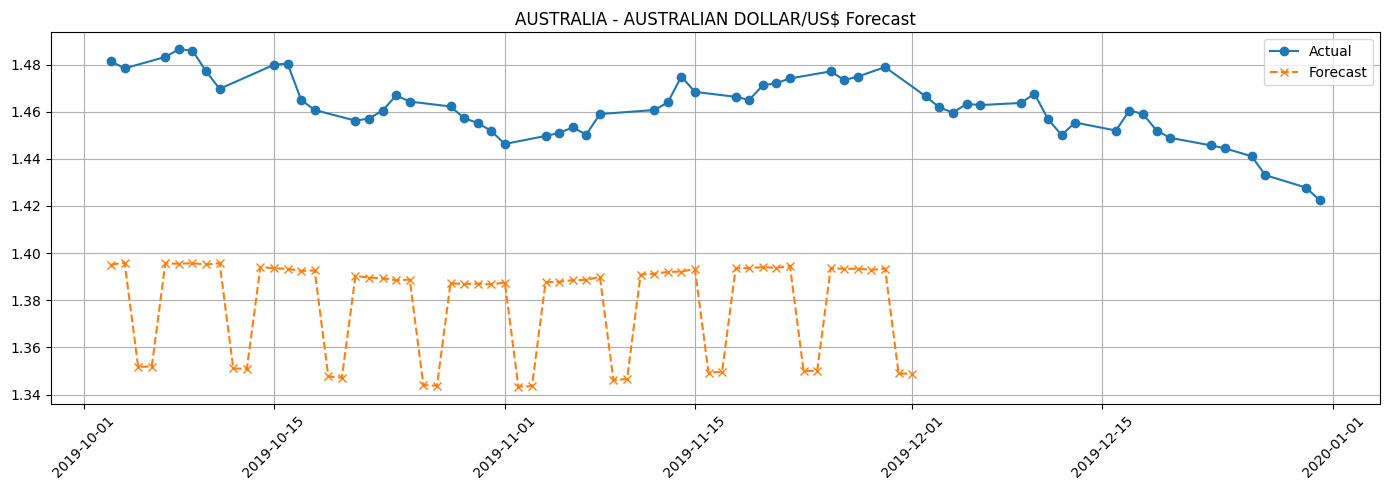

08:18:13 - cmdstanpy - INFO - Chain [1] start processing
08:18:18 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_EURO_AREA_-_EURO_US$.joblib


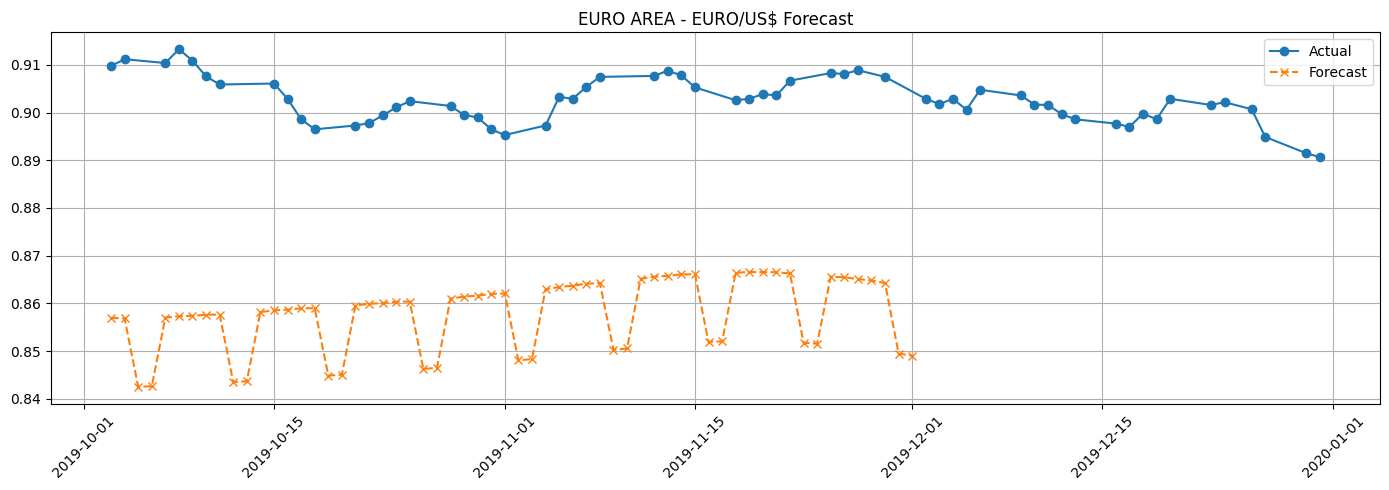

08:18:19 - cmdstanpy - INFO - Chain [1] start processing
08:18:25 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_NEW_ZEALAND_-_NEW_ZELAND_DOLLAR_US$.joblib


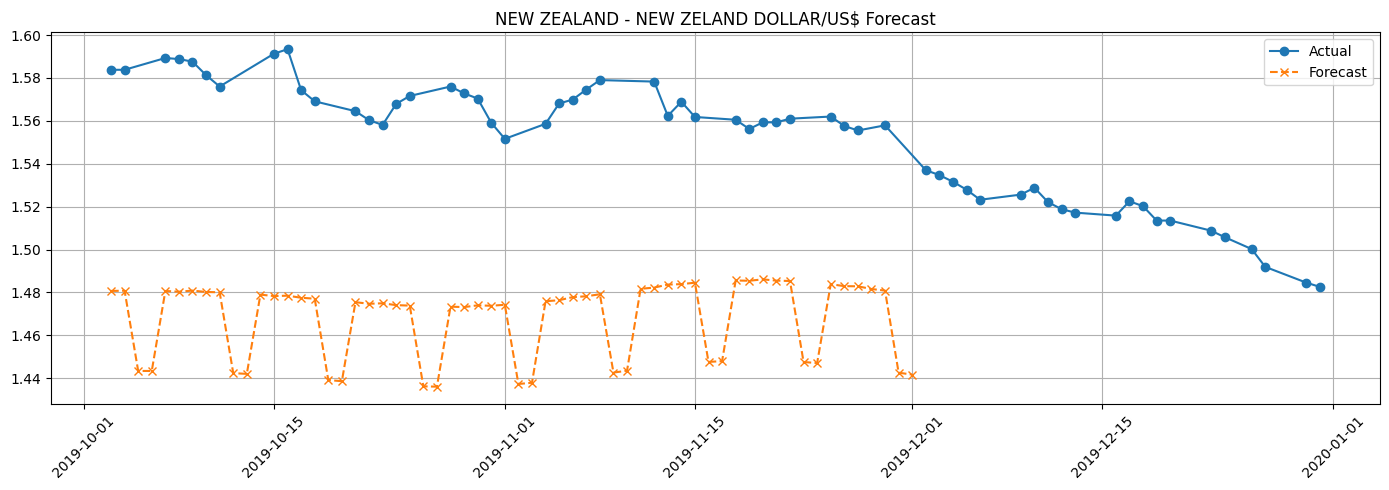

08:18:26 - cmdstanpy - INFO - Chain [1] start processing
08:18:29 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_UNITED_KINGDOM_-_UNITED_KINGDOM_POUND_US$.joblib


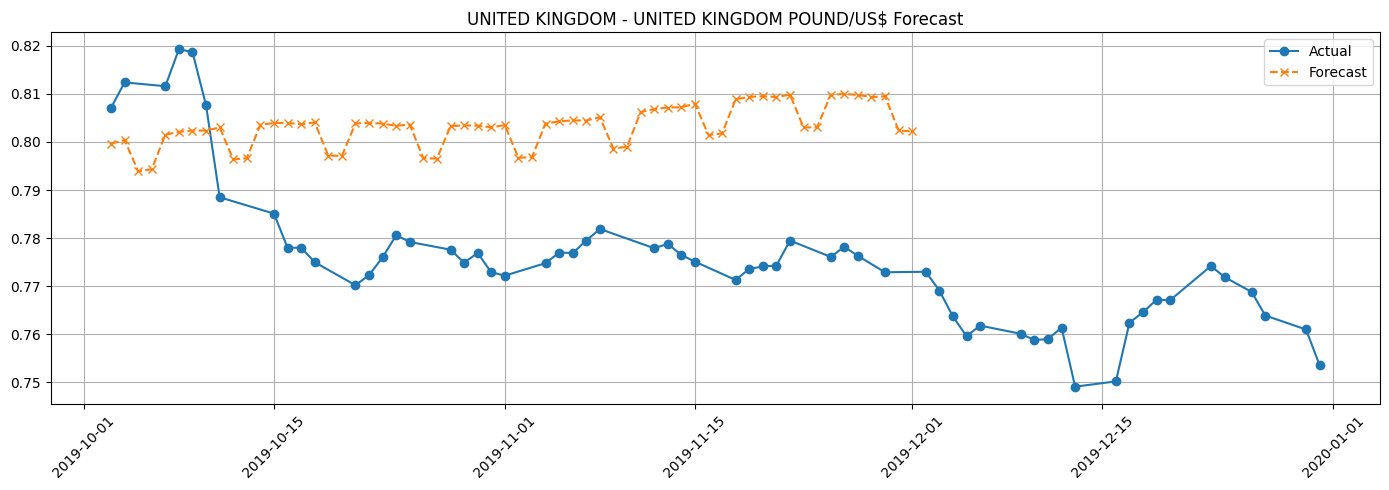

08:18:31 - cmdstanpy - INFO - Chain [1] start processing
08:18:33 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_BRAZIL_-_REAL_US$.joblib


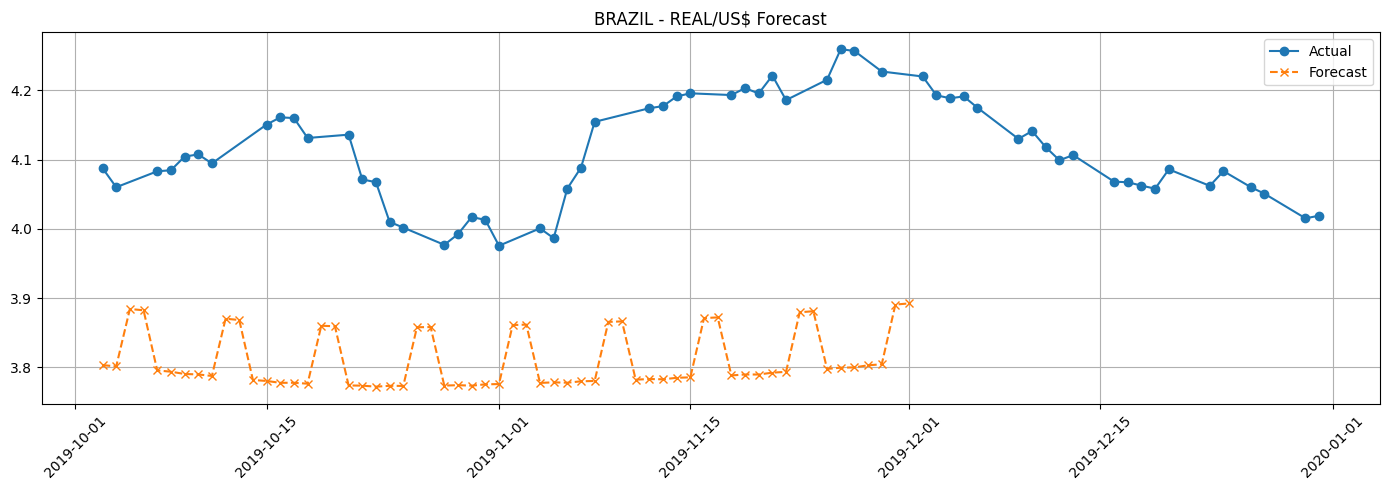

08:18:35 - cmdstanpy - INFO - Chain [1] start processing
08:18:40 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_CANADA_-_CANADIAN_DOLLAR_US$.joblib


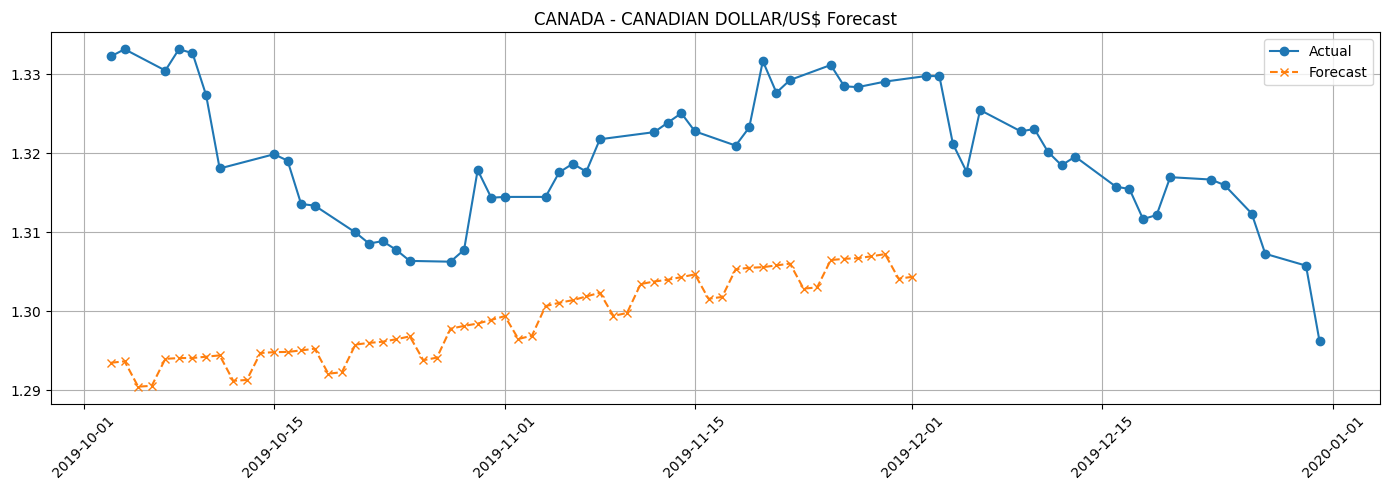

08:18:41 - cmdstanpy - INFO - Chain [1] start processing
08:18:44 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_CHINA_-_YUAN_US$.joblib


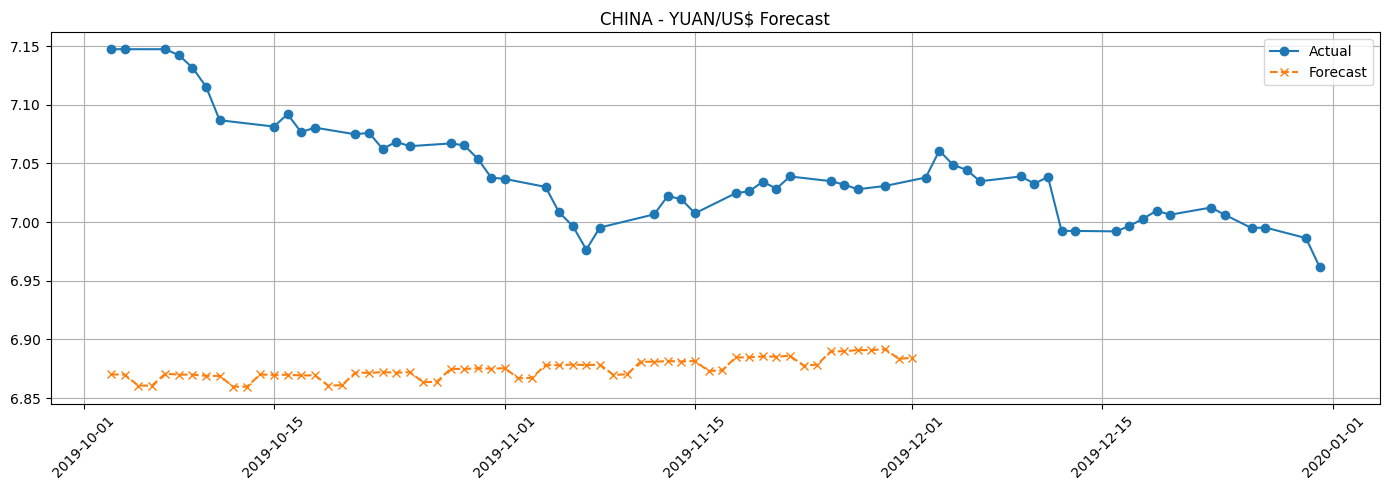

08:18:46 - cmdstanpy - INFO - Chain [1] start processing
08:18:55 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_HONG_KONG_-_HONG_KONG_DOLLAR_US$.joblib


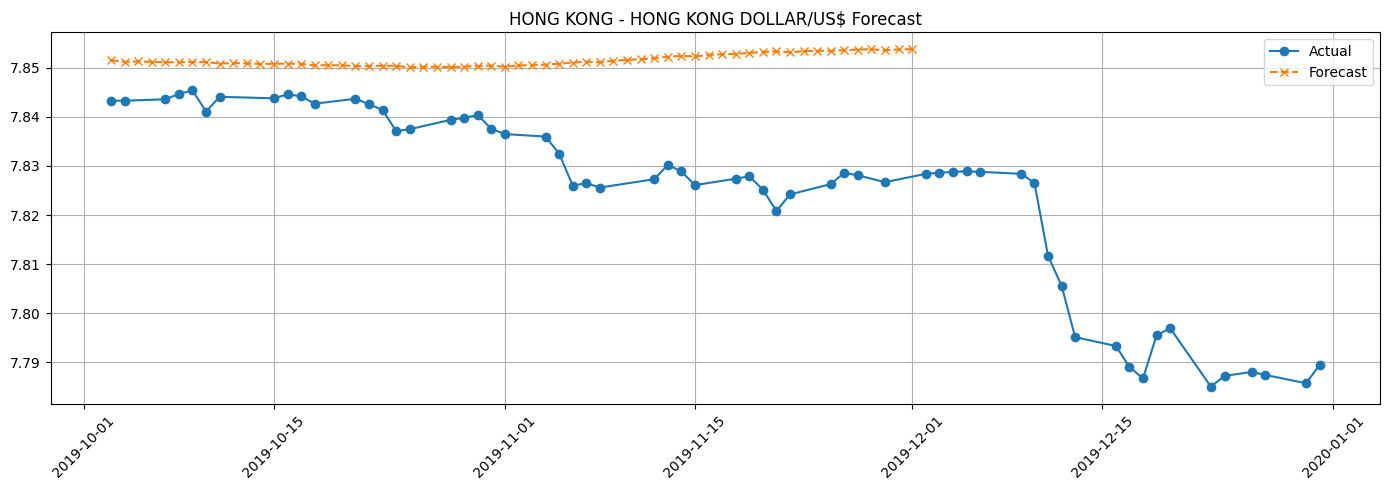

08:18:57 - cmdstanpy - INFO - Chain [1] start processing
08:19:00 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_INDIA_-_INDIAN_RUPEE_US$.joblib


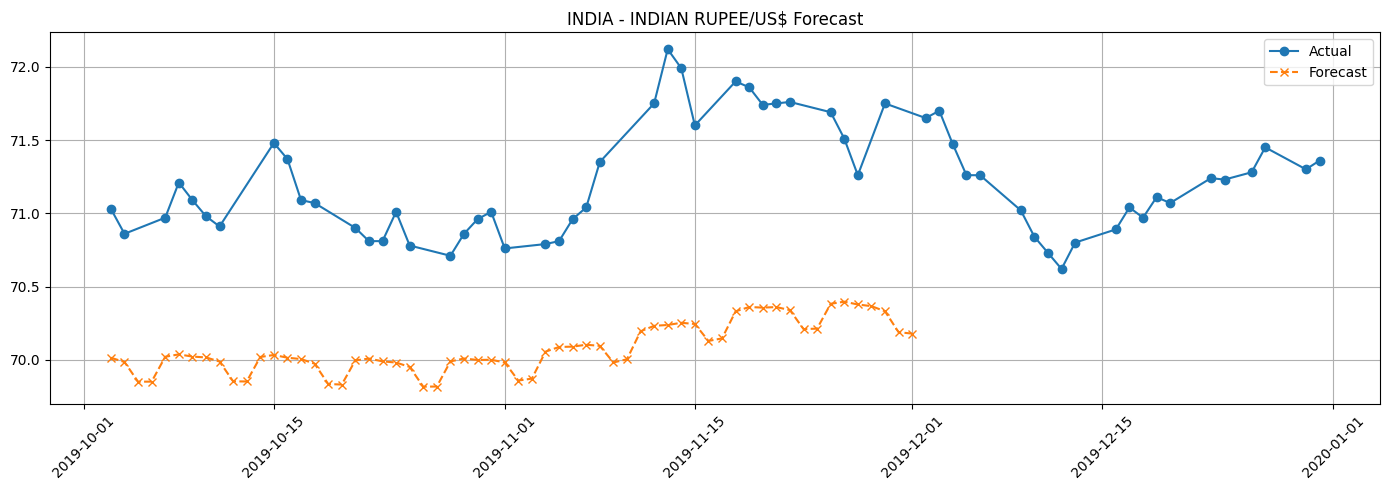

08:19:01 - cmdstanpy - INFO - Chain [1] start processing
08:19:05 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_KOREA_-_WON_US$.joblib


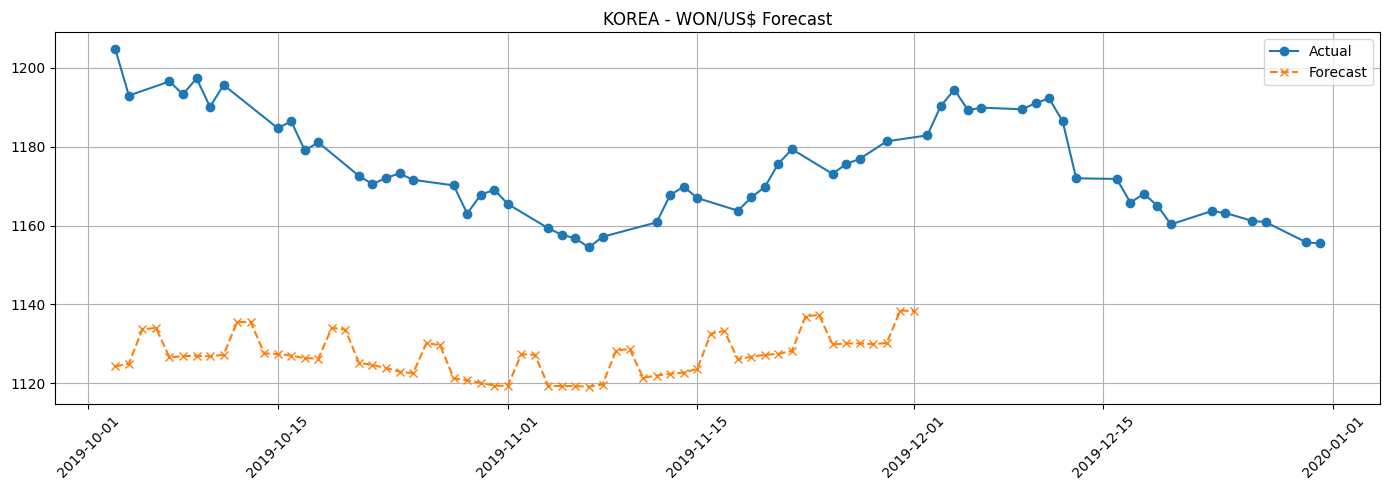

08:19:07 - cmdstanpy - INFO - Chain [1] start processing
08:19:09 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_MEXICO_-_MEXICAN_PESO_US$.joblib


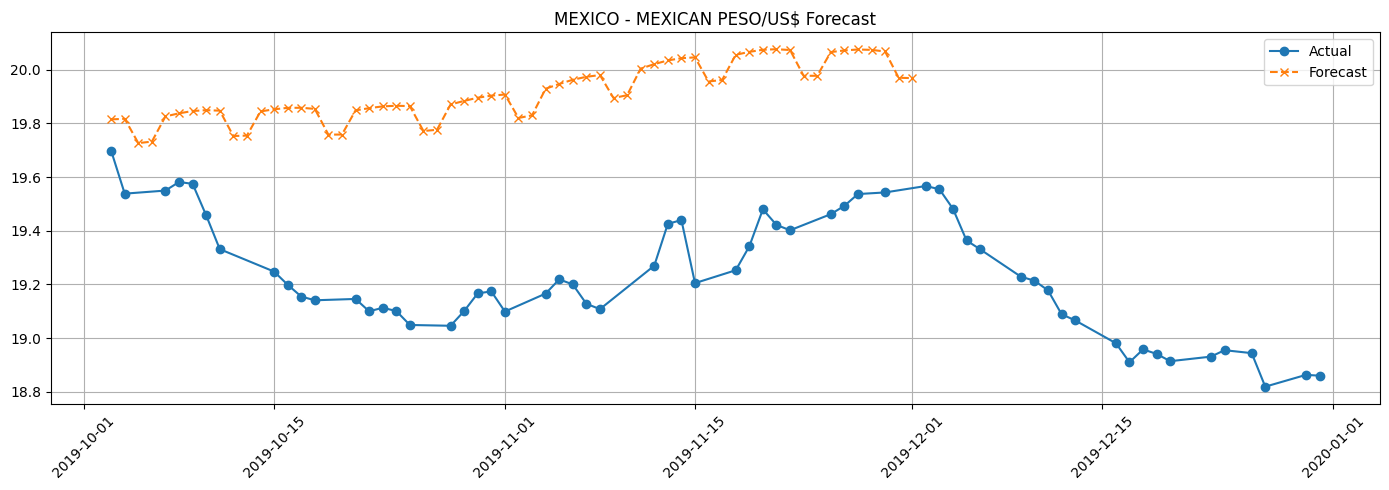

08:19:10 - cmdstanpy - INFO - Chain [1] start processing
08:19:13 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_SOUTH_AFRICA_-_RAND_US$.joblib


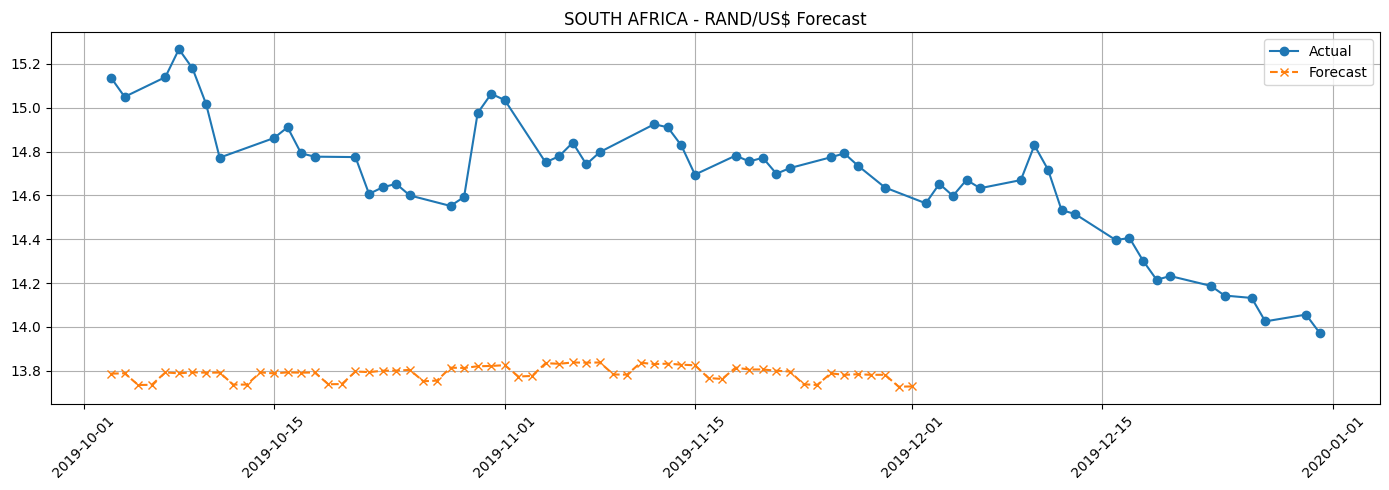

08:19:15 - cmdstanpy - INFO - Chain [1] start processing
08:19:19 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_SINGAPORE_-_SINGAPORE_DOLLAR_US$.joblib


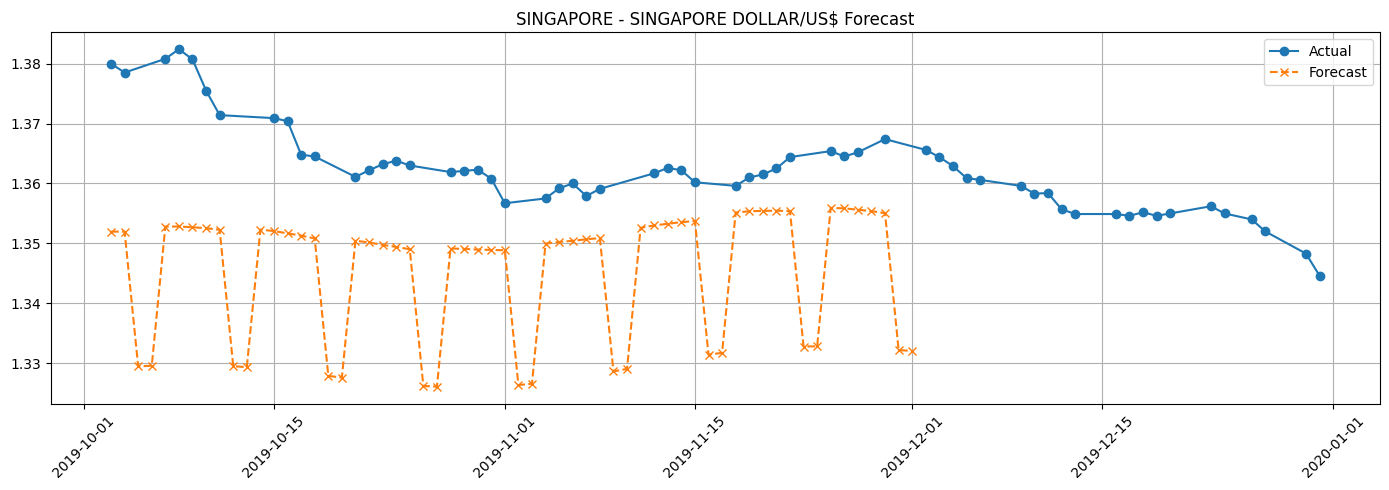

08:19:20 - cmdstanpy - INFO - Chain [1] start processing
08:19:24 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_DENMARK_-_DANISH_KRONE_US$.joblib


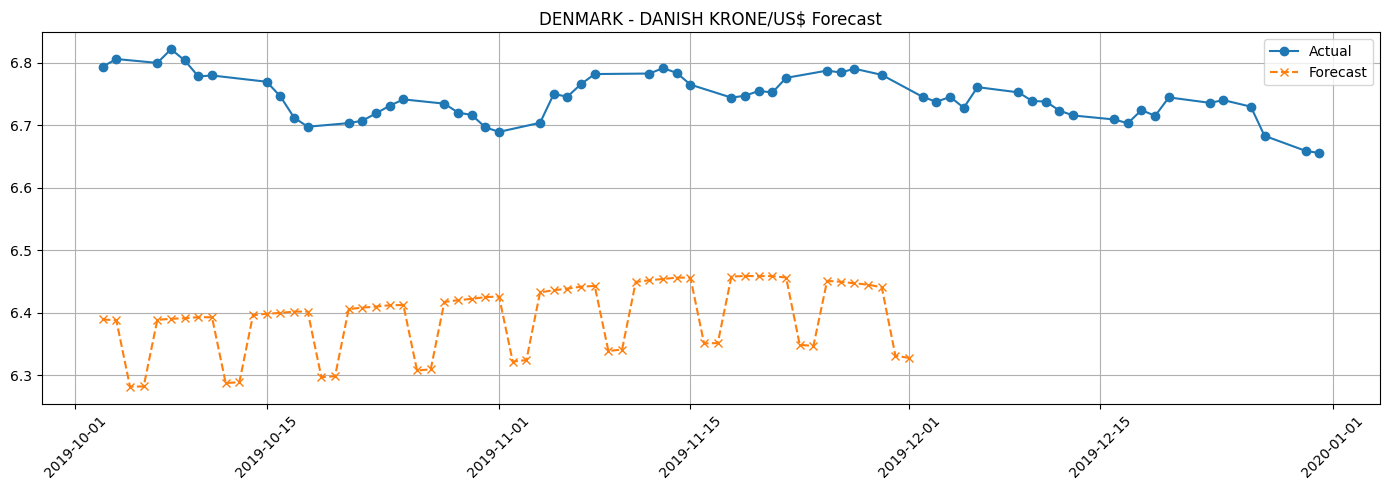

08:19:25 - cmdstanpy - INFO - Chain [1] start processing
08:19:28 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_JAPAN_-_YEN_US$.joblib


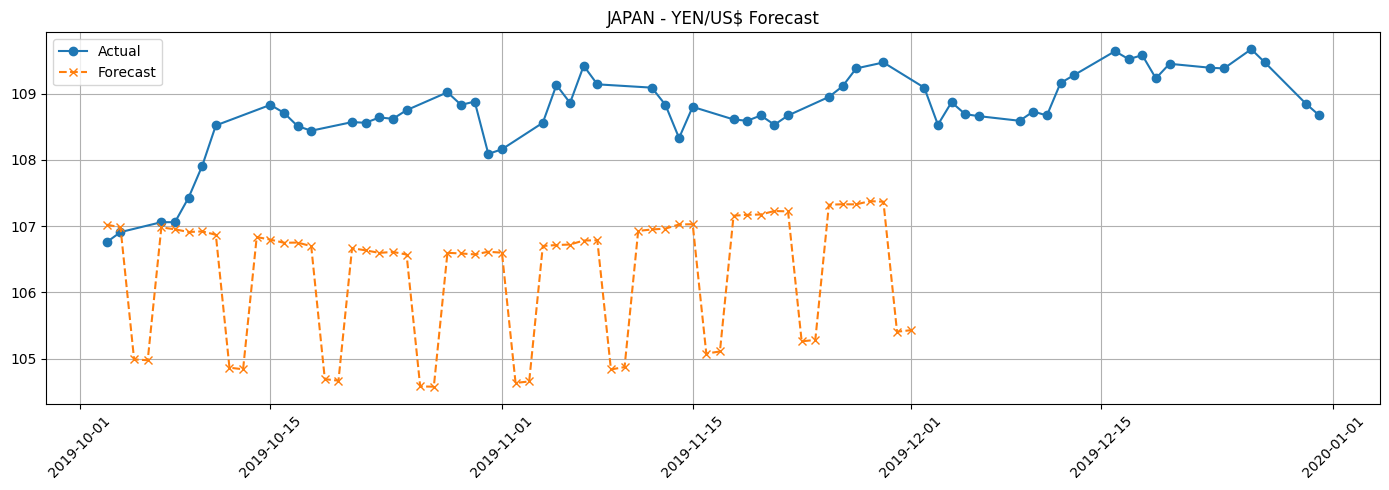

08:19:30 - cmdstanpy - INFO - Chain [1] start processing
08:19:33 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_MALAYSIA_-_RINGGIT_US$.joblib


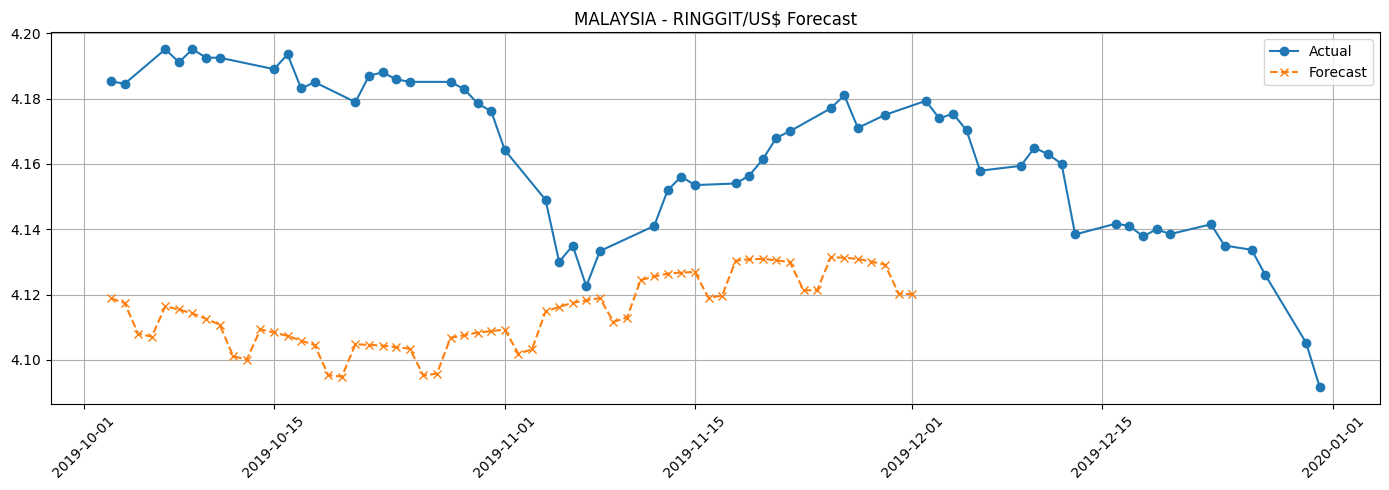

08:19:35 - cmdstanpy - INFO - Chain [1] start processing
08:19:37 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_NORWAY_-_NORWEGIAN_KRONE_US$.joblib


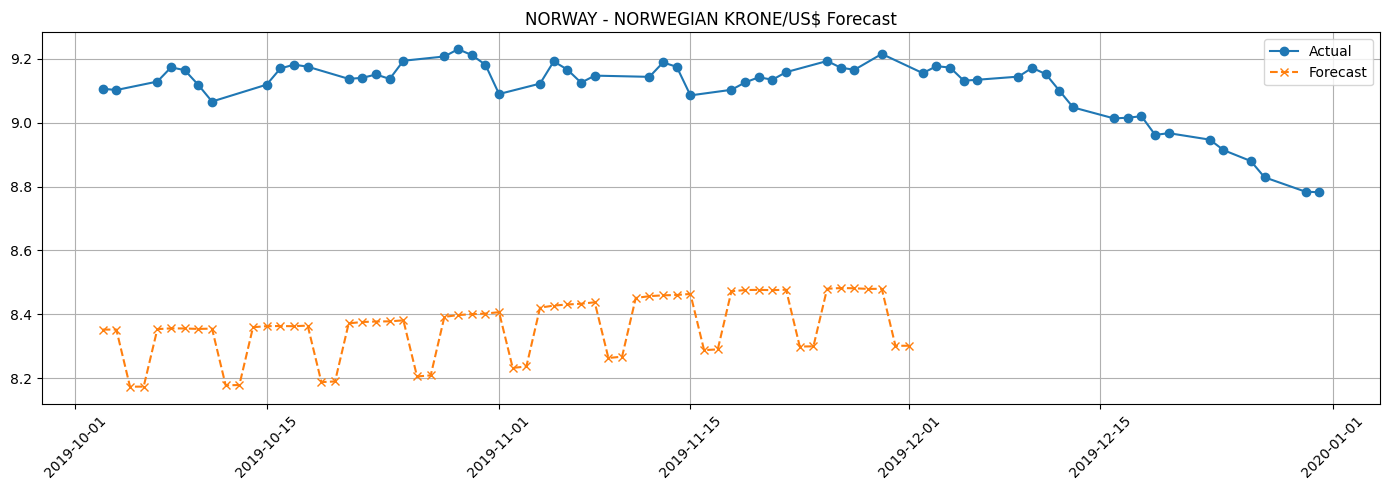

08:19:39 - cmdstanpy - INFO - Chain [1] start processing
08:19:43 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_SWEDEN_-_KRONA_US$.joblib


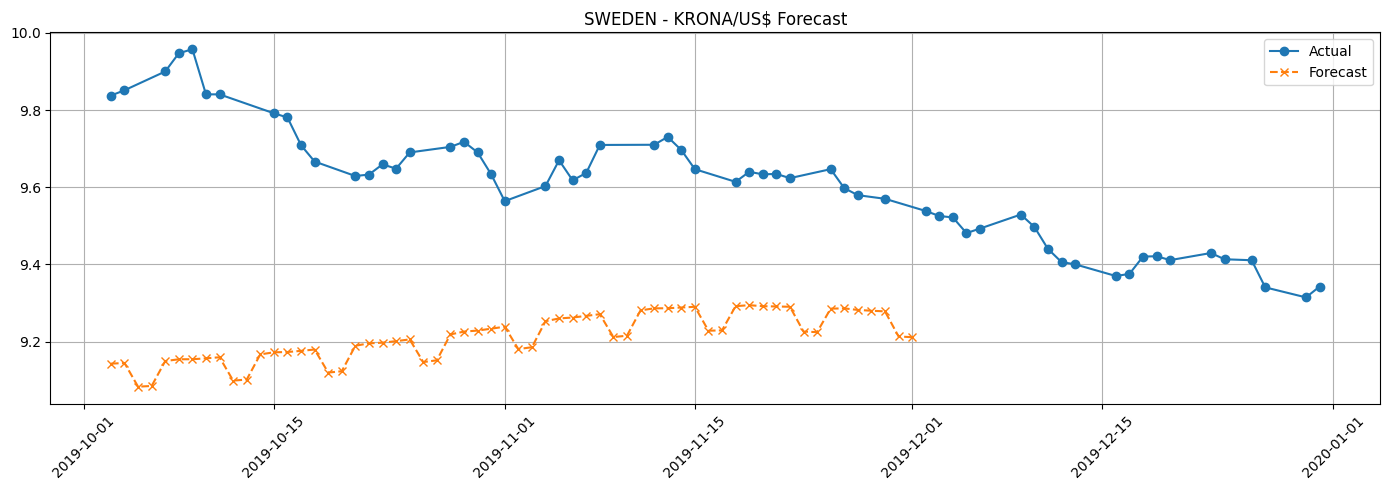

08:19:45 - cmdstanpy - INFO - Chain [1] start processing
08:19:49 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_SRI_LANKA_-_SRI_LANKAN_RUPEE_US$.joblib


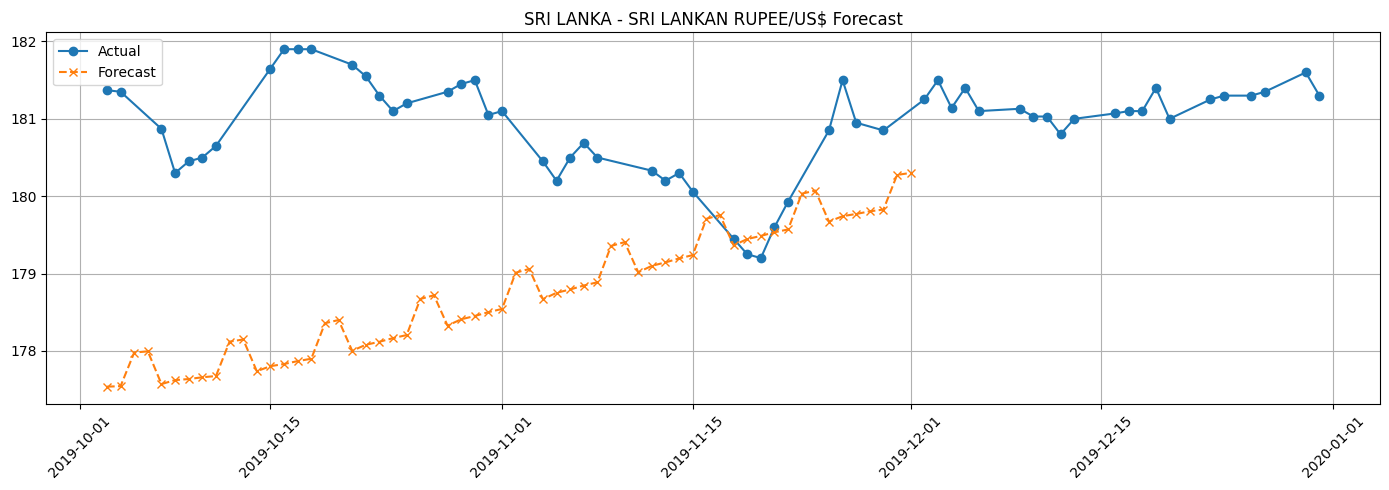

08:19:50 - cmdstanpy - INFO - Chain [1] start processing
08:19:54 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_SWITZERLAND_-_FRANC_US$.joblib


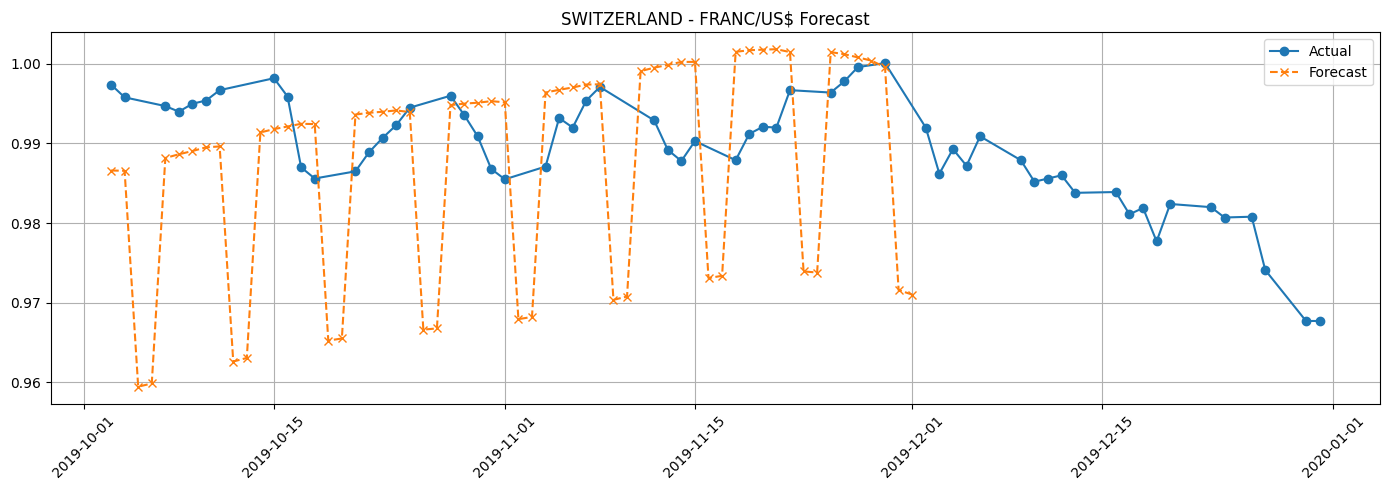

08:19:56 - cmdstanpy - INFO - Chain [1] start processing
08:19:59 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_TAIWAN_-_NEW_TAIWAN_DOLLAR_US$.joblib


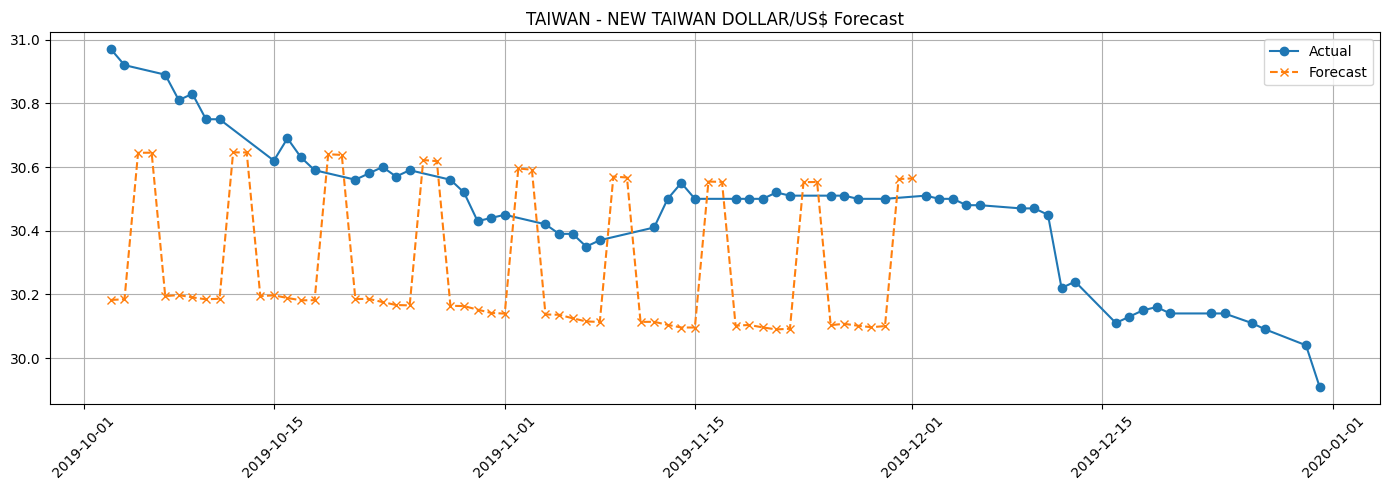

08:20:01 - cmdstanpy - INFO - Chain [1] start processing
08:20:04 - cmdstanpy - INFO - Chain [1] done processing


Saved model: prophet_models/prophet_model_THAILAND_-_BAHT_US$.joblib


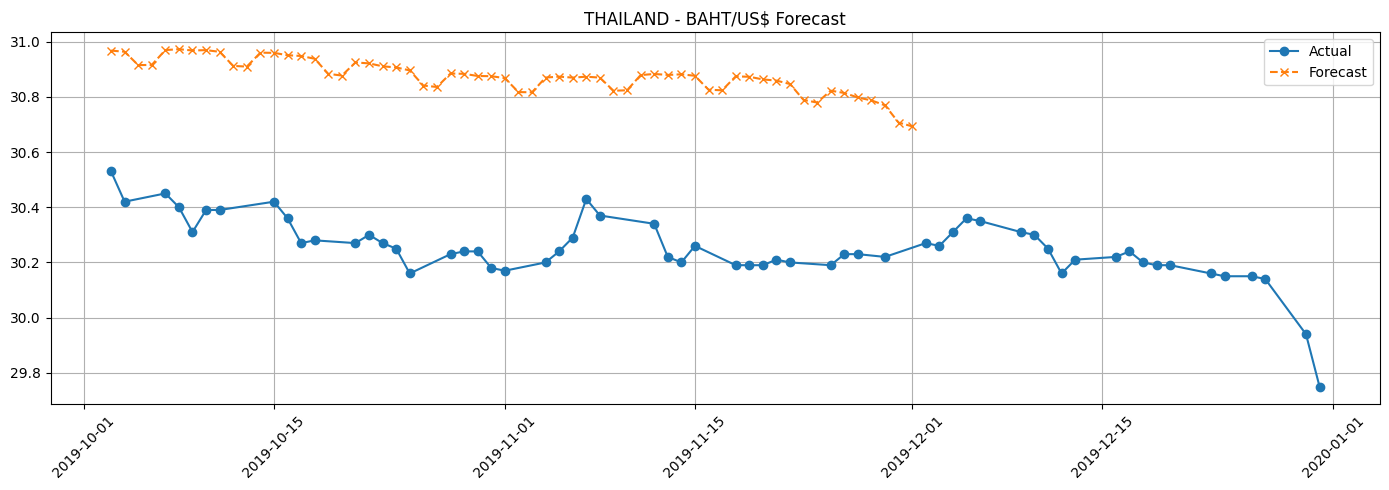

✅ Processing complete with:
- Metrics saved: forecast_metrics.csv
- Forecasts saved: currency_forecasts.csv


In [ ]:

# Initialize storage
metrics_df = pd.DataFrame(columns=['Currency', 'RMSE', 'MAE', 'MAPE'])
forecast_dfs = []

# Only process currency columns (excluding index and ds)
currency_columns = [col for col in train_data.columns
                   if col not in ['index', 'ds'] and train_data[col].dtype == 'float64']

for idx, currency_col in enumerate(currency_columns):
    # --- Data Preparation ---
    prophet_train = pd.DataFrame({
        'ds': train_data['ds'],
        'y': train_data[currency_col]
    })

    # --- Model Training ---
    model = Prophet()
    model.fit(prophet_train)

    # --- Model Saving (NO nested loop!) ---
    safe_name = currency_col.replace("/", "_").replace(" ", "_")
    model_path = os.path.join('prophet_models', f'prophet_model_{safe_name}.joblib')
    joblib.dump(model, model_path)
    print(f"Saved model: {model_path}")

    # --- Forecasting ---
    future = model.make_future_dataframe(periods=60)
    forecast = model.predict(future)

    # --- Extract predictions and actual values ---
    preds = forecast.tail(60)['yhat'].values
    actual = test_data[currency_col].values

    # --- Calculate Metrics ---
    rmse = np.sqrt(mean_squared_error(actual, preds))
    mae = mean_absolute_error(actual, preds)
    epsilon = 1e-10  # To avoid division by zero
    mape = np.mean(np.abs((actual - preds) / (actual + epsilon))) * 100

    # --- Store Metrics ---
    metrics_df.loc[idx] = [currency_col, rmse, mae, mape]

    # --- Store Forecasts ---
    forecast_df = pd.DataFrame({
        'ds': future.tail(60)['ds'],
        currency_col: preds
    })
    forecast_dfs.append(forecast_df.set_index('ds'))

    # --- Plotting ---
    plt.figure(figsize=(14, 5))
    plt.plot(test_data['ds'], actual, label='Actual', marker='o')
    plt.plot(future.tail(60)['ds'], preds, label='Forecast', linestyle='--', marker='x')
    plt.title(f"{currency_col} Forecast")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Combine and Save Outputs ---
metrics_df.to_csv("forecast_metrics.csv", index=False)
combined_forecasts = pd.concat(forecast_dfs, axis=1).reset_index()
combined_forecasts.to_csv("currency_forecasts.csv", index=False)

print("✅ Processing complete with:")
print("- Metrics saved: forecast_metrics.csv")
print("- Forecasts saved: currency_forecasts.csv")

In [ ]:
metrics_df

,Currency,RMSE,MAE,MAPE
0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,0.086387,0.083069,5.675530
1,EURO AREA - EURO/US$,0.045760,0.044869,4.968104
2,NEW ZEALAND - NEW ZELAND DOLLAR/US$,0.089796,0.082553,5.287918
3,UNITED KINGDOM - UNITED KINGDOM POUND/US$,0.032764,0.030553,3.964928
4,BRAZIL - REAL/US$,0.313348,0.300303,7.271563
5,CANADA - CANADIAN DOLLAR/US$,0.022694,0.020637,1.560377
6,CHINA - YUAN/US$,0.173696,0.166596,2.361763
7,HONG KONG - HONG KONG DOLLAR/US$,0.033784,0.027152,0.347648
8,INDIA - INDIAN RUPEE/US$,1.204226,1.131346,1.586043
9,KOREA - WON/US$,49.617531,47.488339,4.030795
